In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# built in python modules
import datetime
import logging
import os
import inspect

# python add-ons
import numpy as np
import pandas as pd

In [2]:
import pvlib
from pvlib.location import Location

In [3]:
tus = Location(32.2, -111, 'US/Arizona', 700, 'Tucson')
print(tus)
golden = Location(39.742476, -105.1786, 'America/Denver', 1830, 'Golden')
print(golden)
golden_mst = Location(39.742476, -105.1786, 'MST', 1830, 'Golden MST')
print(golden_mst)

Tucson: latitude=32.2, longitude=-111, tz=US/Arizona, altitude=700
Golden: latitude=39.742476, longitude=-105.1786, tz=America/Denver, altitude=1830
Golden MST: latitude=39.742476, longitude=-105.1786, tz=MST, altitude=1830


In [4]:
times = pd.date_range(start=datetime.datetime(2014,6,23), end=datetime.datetime(2014,6,24), freq='1Min')
times_loc = times.tz_localize(tus.pytz)

In [5]:
times

DatetimeIndex(['2014-06-23 00:00:00', '2014-06-23 00:01:00',
               '2014-06-23 00:02:00', '2014-06-23 00:03:00',
               '2014-06-23 00:04:00', '2014-06-23 00:05:00',
               '2014-06-23 00:06:00', '2014-06-23 00:07:00',
               '2014-06-23 00:08:00', '2014-06-23 00:09:00', 
               ...
               '2014-06-23 23:51:00', '2014-06-23 23:52:00',
               '2014-06-23 23:53:00', '2014-06-23 23:54:00',
               '2014-06-23 23:55:00', '2014-06-23 23:56:00',
               '2014-06-23 23:57:00', '2014-06-23 23:58:00',
               '2014-06-23 23:59:00', '2014-06-24 00:00:00'],
              dtype='datetime64[ns]', length=1441, freq='T', tz=None)

In [6]:
pyephemout = pvlib.solarposition.pyephem(times, tus)
# 20150621-cjw spaout = pvlib.solarposition.spa(times, tus)
spaout = pvlib.solarposition.spa_python(times, tus)


pvlib.solarosition.pyephem: sun_coords['apparent_zenith']  #cjwcjw
2014-06-23 07:00:00+00:00    124.028890
2014-06-23 23:40:00+00:00     55.981621
Freq: 1000T, Name: apparent_zenith, dtype: float64


pvlib.solarosition.pyephem: sun_coords['apparent_zenith']  #cjwcjw
2014-06-23 07:00:00+00:00    124.028890
2014-06-23 23:40:00+00:00     55.981621
Freq: 1000T, Name: apparent_zenith, dtype: float64
pyephem
                           apparent_elevation  apparent_azimuth  elevation  \
2014-06-23 00:00:00-07:00          -34.028890        352.757414 -34.028890   
2014-06-23 00:01:00-07:00          -34.055060        353.032425 -34.055060   
2014-06-23 00:02:00-07:00          -34.080223        353.307627 -34.080223   
2014-06-23 00:03:00-07:00          -34.104374        353.583047 -34.104374   
2014-06-23 00:04:00-07:00          -34.127518        353.858659 -34.127518   

                              azimuth  apparent_zenith      zenith  
2014-06-23 00:00:00-07:00  352.757414       124.028890  124.028890  
2014-06-23 00:01:00-07:00  353.032425       124.055060  124.055060  
2014-06-23 00:02:00-07:00  353.307627       124.080223  124.080223  
2014-06-23 00:03:00-07:00  353.583047       124.1

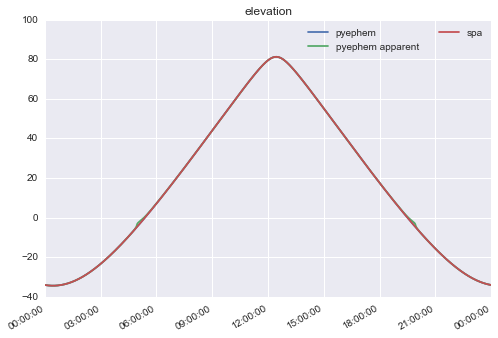

In [7]:
reload(pvlib.solarposition)
pyephemout = pvlib.solarposition.pyephem(times_loc, tus)
# 20150621-cjw spaout = pvlib.solarposition.spa(times_loc, tus)
spaout = pvlib.solarposition.spa_python(times_loc, tus)

pyephemout['elevation'].plot(label='pyephem');
pyephemout['apparent_elevation'].plot(label='pyephem apparent');
spaout['elevation'].plot(label='spa');
plt.legend(ncol=2);
plt.title('elevation');

print('pyephem')
print(pyephemout.head())
print('spa')
print(spaout.head())

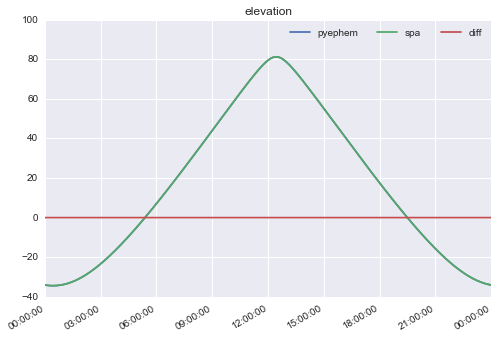

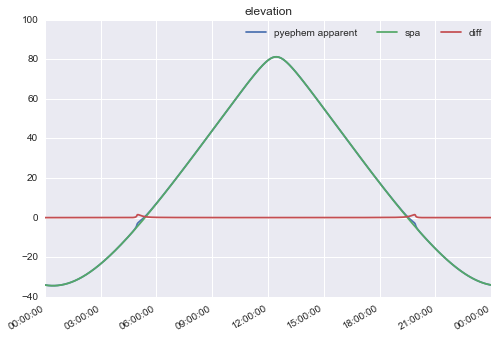

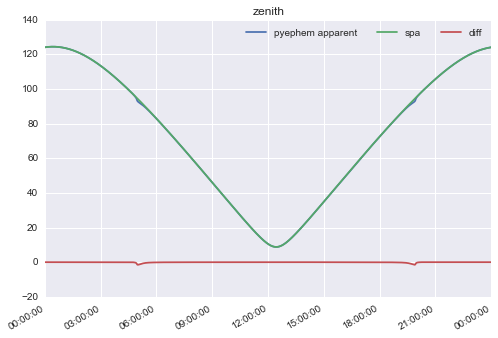

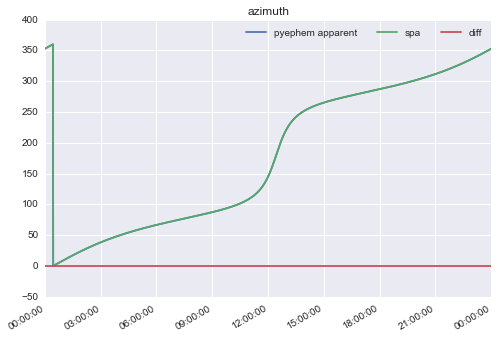

In [8]:
plt.figure();
pyephemout['elevation'].plot(label='pyephem');
spaout['elevation'].plot(label='spa');
(pyephemout['elevation'] - spaout['elevation']).plot(label='diff');
plt.legend(ncol=3);
plt.title('elevation');

plt.figure();
pyephemout['apparent_elevation'].plot(label='pyephem apparent');
spaout['elevation'].plot(label='spa');
(pyephemout['apparent_elevation'] - spaout['elevation']).plot(label='diff');
plt.legend(ncol=3);
plt.title('elevation');

plt.figure();
pyephemout['apparent_zenith'].plot(label='pyephem apparent');
spaout['zenith'].plot(label='spa');
(pyephemout['apparent_zenith'] - spaout['zenith']).plot(label='diff');
plt.legend(ncol=3);
plt.title('zenith');

plt.figure();
pyephemout['apparent_azimuth'].plot(label='pyephem apparent');
spaout['azimuth'].plot(label='spa');
(pyephemout['apparent_azimuth'] - spaout['azimuth']).plot(label='diff');
plt.legend(ncol=3);
plt.title('azimuth');

pvlib.solarosition.pyephem: sun_coords['apparent_zenith']  #cjwcjw
2014-06-23 07:00:00+00:00    124.028890
2014-06-23 23:40:00+00:00     55.981621
Freq: 1000T, Name: apparent_zenith, dtype: float64
pyephem
                           apparent_elevation  apparent_azimuth  elevation  \
2014-06-23 00:00:00-07:00          -34.028890        352.757414 -34.028890   
2014-06-23 00:01:00-07:00          -34.055060        353.032425 -34.055060   
2014-06-23 00:02:00-07:00          -34.080223        353.307627 -34.080223   
2014-06-23 00:03:00-07:00          -34.104374        353.583047 -34.104374   
2014-06-23 00:04:00-07:00          -34.127518        353.858659 -34.127518   

                              azimuth  apparent_zenith      zenith  
2014-06-23 00:00:00-07:00  352.757414       124.028890  124.028890  
2014-06-23 00:01:00-07:00  353.032425       124.055060  124.055060  
2014-06-23 00:02:00-07:00  353.307627       124.080223  124.080223  
2014-06-23 00:03:00-07:00  353.583047       124.1

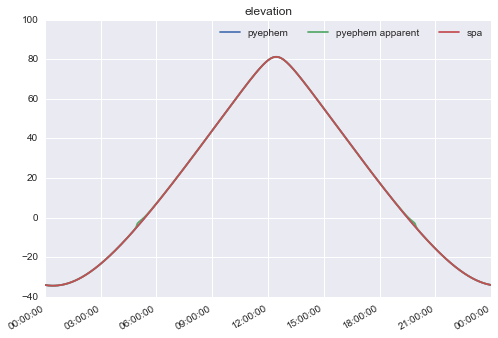

In [9]:
reload(pvlib.solarposition)
pyephemout = pvlib.solarposition.pyephem(times, tus)
# 20150621-cjw spaout = pvlib.solarposition.spa(times, tus)
spaout = pvlib.solarposition.spa_python(times, tus)

pyephemout['elevation'].plot(label='pyephem');
pyephemout['apparent_elevation'].plot(label='pyephem apparent');
spaout['elevation'].plot(label='spa');
plt.legend(ncol=3);
plt.title('elevation');

print('pyephem')
print(pyephemout.head())
print('spa')
print(spaout.head())

pvlib.solarosition.pyephem: sun_coords['apparent_zenith']  #cjwcjw
2014-06-23 06:00:00+00:00    115.154820
2014-06-23 22:40:00+00:00     48.199604
Freq: 1000T, Name: apparent_zenith, dtype: float64
pyephem
                           apparent_elevation  apparent_azimuth  elevation  \
2014-06-23 00:00:00-06:00          -25.154820        344.064195 -25.154820   
2014-06-23 00:01:00-06:00          -25.207201        344.310956 -25.207201   
2014-06-23 00:02:00-06:00          -25.258784        344.558018 -25.258784   
2014-06-23 00:03:00-06:00          -25.309568        344.805380 -25.309568   
2014-06-23 00:04:00-06:00          -25.359552        345.053043 -25.359552   

                              azimuth  apparent_zenith      zenith  
2014-06-23 00:00:00-06:00  344.064195       115.154820  115.154820  
2014-06-23 00:01:00-06:00  344.310956       115.207201  115.207201  
2014-06-23 00:02:00-06:00  344.558018       115.258784  115.258784  
2014-06-23 00:03:00-06:00  344.805380       115.3

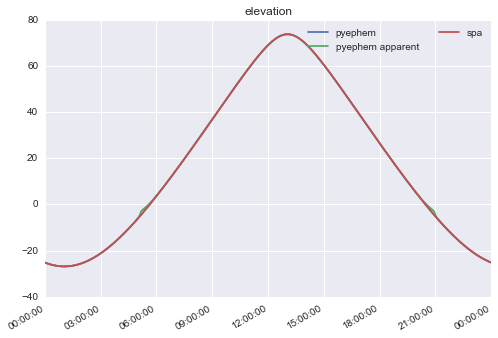

In [10]:
reload(pvlib.solarposition)
pyephemout = pvlib.solarposition.pyephem(times, golden)
# 20150621-cjw sspaout = pvlib.solarposition.spa(times, golden)
spaout = pvlib.solarposition.spa_python(times, golden)

pyephemout['elevation'].plot(label='pyephem')
pyephemout['apparent_elevation'].plot(label='pyephem apparent');
spaout['elevation'].plot(label='spa');
plt.legend(ncol=2);
plt.title('elevation');

print('pyephem')
print(pyephemout.head())
print('spa')
print(spaout.head())

## Python and [module versions, and dates](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)

In [11]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas, pvlib

Software versions
Python 2.7.8 32bit [MSC v.1500 32 bit (Intel)]
IPython 3.2.0
OS Windows 7 6.1.7601 SP1
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
pandas 0.16.2
pvlib 0.2.1dev
Sun Jul 12 20:06:26 2015 South Africa Standard Time